In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = pd.read_csv('train.csv')

# Calculate the mean of the Age column
age_mean = df['Age'].mean()
#df.drop('Cabin', axis=1, inplace=True)


# Fill missing values with the mean value
df['Age'].fillna(age_mean, inplace=True)

# Save the dataframe to a new CSV file
df.to_csv('train.csv', index=False)


In [6]:
df1 = pd.read_csv('test.csv')

# Calculate the mean of the Age column
age_mean1 = df1['Age'].mean()
fare_mean1=df1["Fare"].mean()
#df.drop('Cabin', axis=1, inplace=True)


# Fill missing values with the mean value
df1['Age'].fillna(age_mean1, inplace=True)
df1['Fare'].fillna(fare_mean1,inplace=True)

# Save the dataframe to a new CSV file
df1.to_csv('test.csv', index=False)


In [7]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Embarked'>

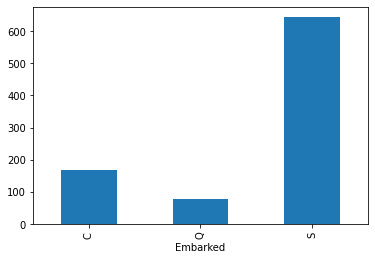

In [9]:
train.groupby('Embarked').size().plot(kind='bar')

In [10]:
train['Embarked'].fillna('S', inplace=True)
#since s has highest values,2 missing values in embarked is S

In [11]:
# make a list of all the posible Decks, the last element is used when no cabin code is present
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
#define a function that replaces the cabin code with the deck character
def search_substring(big_string, substring_list):
    for substring in substring_list:
        if substring in big_string:
            return substring
    return substring_list[-1]

In [12]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618,43.45456798])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (5,), b_init type: <class 'float'>


In [13]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
def search_substring_sidd(substring):
  if(substring[0] in cabin_list):
    return subbstring
  return substring_list[-1]


In [14]:

# replace passenger's name with his/her title (Mr, Mrs, Miss, Master)
def get_title(string):
    import re
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    if results != None:
        return(results.group().lower())
    else:
        return(str(np.nan))

In [15]:
title_dictionary = {
    "capt":"Officer", 
    "col":"Officer", 
    "major":"Officer", 
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [16]:
train['Deck'] = train['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
#test_set['Deck'] = test_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
# delete the Cabin feature
train.drop('Cabin', 1, inplace=True)
#test_set.drop('Cabin', 1, inplace=True)

train['Title'] = train['Name'].apply(get_title)
#test_set['Title'] = test_set['Name'].apply(get_title)
train['Title'] = train['Title'].map(title_dictionary)
#test_set['Title'] = test_set['Title'].map(title_dictionary)
# delete the Name feature
train.drop('Name', 1, inplace=True)
#test_set.drop('Name', 1, inplace=True)



<ipython-input-16-69655b3b89a8>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('Cabin', 1, inplace=True)
<ipython-input-16-69655b3b89a8>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('Name', 1, inplace=True)


In [17]:
test['Deck'] = test['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
#test_set['Deck'] = test_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
# delete the Cabin feature
test.drop('Cabin', 1, inplace=True)
#test_set.drop('Cabin', 1, inplace=True)

test['Title'] = test['Name'].apply(get_title)
#test_set['Title'] = test_set['Name'].apply(get_title)
test['Title'] = test['Title'].map(title_dictionary)
#test_set['Title'] = test_set['Title'].map(title_dictionary)
# delete the Name feature
test.drop('Name', 1, inplace=True)
#test_set.drop('Name', 1, inplace=True)



<ipython-input-17-7b67d70bebd3>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop('Cabin', 1, inplace=True)
<ipython-input-17-7b67d70bebd3>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop('Name', 1, inplace=True)


In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Unknown,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mr
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,Mr
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Unknown,Mr


In [19]:
train.drop('Ticket', 1, inplace=True)

<ipython-input-19-912157a19ee1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('Ticket', 1, inplace=True)


In [20]:
means_title = train.groupby('Title')['Age'].mean()
title_list = ['Mr','Miss','Mrs','Master', 'Royalty', 'Officer']
def age_nan_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title #extract indices of samples with same title
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) # replace nan values for mean
        

age_nan_replace(means_title, train, title_list)
#age_nan_replace(means_title, test_set, title_list)

In [21]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
886,887,0,2,male,27.000000,0,0,13.00,S,Unknown,Officer
887,888,1,1,female,19.000000,0,0,30.00,S,B,Miss
888,889,0,3,female,21.555556,1,2,23.45,S,Unknown,Miss
889,890,1,1,male,26.000000,0,0,30.00,C,C,Mr
890,891,0,3,male,32.000000,0,0,7.75,Q,Unknown,Mr


In [22]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Deck            0
Title           0
dtype: int64

In [23]:
import numpy
X_train_age=numpy.array([train["Age"]])
X_train_pclass=numpy.array(train["Pclass"])
X_train_SibSp=numpy.array(train["SibSp"])
X_train_Parch=numpy.array(train["Parch"])
X_train_Fare=numpy.array(train["Fare"])
X_train_Title=numpy.array(train["Title"])
X_train_Embarked=numpy.array(train["Embarked"])
X_train_Sex=numpy.array(train["Sex"])
X_train_Survived=numpy.array(train["Survived"])

X_test_age=numpy.array([test["Age"]])
X_test_pclass=numpy.array(test["Pclass"])
X_test_SibSp=numpy.array(test["SibSp"])
X_test_Parch=numpy.array(test["Parch"])
X_test_Fare=numpy.array(test["Fare"])
X_test_Title=numpy.array(test["Title"])
X_test_Embarked=numpy.array(test["Embarked"])
X_test_Sex=numpy.array(test["Sex"])



In [24]:
mask = X_train_Sex == "male"
X_train_Sex[mask] = 0

mask1=X_train_Sex=="female"
X_train_Sex[mask1]=1

print(X_train_Sex)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

In [25]:
le = LabelEncoder()
X_train_Embarked = le.fit_transform(train['Embarked'])

Embarked_decoded = le.inverse_transform(X_train_Embarked)

print(Embarked_decoded)
print(X_train_Embarked)

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

In [26]:
le = LabelEncoder()
print(train["Title"])
X_train_Title= le.fit_transform(train['Title'])

print(X_train_Title)

0           Mr
1           Mr
2         Miss
3           Mr
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object
[2 2 1 2 2 2 2 0 2 2 1 1 2 2 1 2 0 3 2 2 2 2 1 2 1 2 2 2 1 2 5 2 1 5 2 2 2
 2 1 4 2 2 2 1 1 2 2 4 2 2 0 2 2 2 2 2 1 2 1 0 2 1 2 0 2 0 2 2 1 2 2 1 2 2
 2 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 2 4 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2
 1 2 1 1 2 2 2 2 1 2 2 2 1 2 4 2 2 1 2 4 2 2 2 2 2 1 2 2 2 2 1 2 2 4 2 2 1
 2 4 4 2 2 2 2 3 1 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 1 2 2 2 0 1 2 2 1 2 0 0 1
 2 2 2 2 2 2 2 1 0 2 1 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 4 2 2 1 1 4 2 2 4 1 2 2 4 2 2 2 2 2 2 2 1 1
 2 2 0 2 2 1 2 2 2 2 1 2 2 2 2 1 4 1 2 0 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2
 2 1 2 2 1 2 2 1 3 0 1 2 2 1 1 1 2 2 2 1 2 4 1 2 2 2 1 2 2 1 2 2 2 1 1 2 2
 2 2 2 2 1 2 2 0 1 4 2 2 1 1 2 0 2 2 3 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 3
 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 2 

In [27]:
le = LabelEncoder()
X_train_Deck = le.fit_transform(train['Deck'])

print(X_train_Deck)

[8 2 8 2 8 8 4 8 8 8 6 2 8 8 8 8 8 8 8 8 8 3 8 0 8 8 8 2 8 8 8 1 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 1 2 8 8 8 8 8 1 2 8 8 8 5 8 8 8 8 8 8 8
 8 5 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 8 4 8 8 8 0 3 8 8 8 8 3 8 8 8 8 8 8 8 2
 8 8 8 8 8 8 8 1 8 8 8 8 4 3 8 8 8 4 8 8 8 8 8 8 8 3 2 8 1 8 8 8 8 8 8 8 8
 5 8 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 8 1 8 8 8 0 8 8 2 8 8 8 8 8 5 8
 0 8 8 8 8 8 8 8 5 1 1 8 8 8 8 8 8 8 8 8 6 8 8 8 0 8 8 8 8 8 3 8 8 3 8 8 8
 8 8 2 8 8 8 8 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 3 8 8 6 2 8 8 8 8 1 8
 8 8 8 4 1 8 8 8 8 2 2 8 8 8 2 8 3 8 8 8 8 8 8 8 8 0 8 8 8 8 8 8 1 3 8 8 8
 8 2 2 1 8 8 8 4 8 2 8 2 8 4 2 1 8 8 8 8 8 8 2 4 8 8 8 8 8 2 8 3 8 1 8 2 2
 8 8 8 2 4 8 7 5 2 8 8 8 5 8 8 8 8 8 2 8 8 8 8 4 8 8 8 8 8 8 8 8 8 3 8 8 1
 4 8 8 8 8 8 8 2 8 8 8 8 8 8 8 8 8 8 8 8 1 8 8 3 6 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 2 8 8 8 4 1 8 8 2 8 8 8 8 8
 8 0 8 8 8 2 8 8 2 2 8 8 4 3 8 8 4 8 4 8 8 8 8 8 8 8 8 8 8 3 8 0 8 8 8 8 8
 8 8 8 1 8 2 1 8 8 8 8 2 

In [28]:
print(X_train_Embarked.shape)
print(X_train_age.shape)
print(X_train_Sex.shape)
print(X_train_SibSp.shape)
print(X_train_Parch.shape)
print(X_train_Title.shape)
print(X_train_Fare.shape)
print(X_train_pclass.shape)

print(X_train_age.shape)


(891,)
(1, 891)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(1, 891)


In [30]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'C':0, 'Q':1, 'S':2})
test = test.drop(columns=['Ticket', 'PassengerId'])

age_nan_replace(means_title, test, title_list)

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,0,34.5,0,0,7.8292,1,Unknown,Mr
1,3,1,47.0,1,0,7.0000,2,Unknown,Mr
2,2,0,62.0,0,0,9.6875,1,Unknown,Mr
3,3,0,27.0,0,0,8.6625,2,Unknown,Mr
4,3,1,22.0,1,1,12.2875,2,Unknown,Mr


In [32]:

le = LabelEncoder()
print(test["Title"])
X_test_Title= le.fit_transform(train['Title'])

print(X_test_Title)


0           Mr
1           Mr
2           Mr
3           Mr
4           Mr
        ...   
413         Mr
414    Royalty
415         Mr
416         Mr
417     Master
Name: Title, Length: 418, dtype: object
[2 2 1 2 2 2 2 0 2 2 1 1 2 2 1 2 0 3 2 2 2 2 1 2 1 2 2 2 1 2 5 2 1 5 2 2 2
 2 1 4 2 2 2 1 1 2 2 4 2 2 0 2 2 2 2 2 1 2 1 0 2 1 2 0 2 0 2 2 1 2 2 1 2 2
 2 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 2 4 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2
 1 2 1 1 2 2 2 2 1 2 2 2 1 2 4 2 2 1 2 4 2 2 2 2 2 1 2 2 2 2 1 2 2 4 2 2 1
 2 4 4 2 2 2 2 3 1 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 1 2 2 2 0 1 2 2 1 2 0 0 1
 2 2 2 2 2 2 2 1 0 2 1 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 4 2 2 1 1 4 2 2 4 1 2 2 4 2 2 2 2 2 2 2 1 1
 2 2 0 2 2 1 2 2 2 2 1 2 2 2 2 1 4 1 2 0 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2
 2 1 2 2 1 2 2 1 3 0 1 2 2 1 1 1 2 2 2 1 2 4 1 2 2 2 1 2 2 1 2 2 2 1 1 2 2
 2 2 2 2 1 2 2 0 1 4 2 2 1 1 2 0 2 2 3 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 3
 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 2 0 1 2 1 2 2 

In [33]:
fare_mean = test.Fare.mean()
test.Fare = test.Fare.fillna(fare_mean)

In [34]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

In [35]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,0,34.5,0,0,7.8292,1,Unknown,Mr
1,3,1,47.0,1,0,7.0000,2,Unknown,Mr
2,2,0,62.0,0,0,9.6875,1,Unknown,Mr
3,3,0,27.0,0,0,8.6625,2,Unknown,Mr
4,3,1,22.0,1,1,12.2875,2,Unknown,Mr


In [36]:
le = LabelEncoder()
X_test_Deck = le.fit_transform(test['Deck'])

print(X_test_Deck)

[7 7 7 7 7 7 7 7 7 7 7 7 1 7 4 7 7 7 7 7 7 7 7 7 1 7 1 7 0 7 7 7 7 7 2 7 7
 7 7 7 7 3 7 7 3 7 0 7 3 7 2 7 7 2 7 7 7 5 7 1 7 7 7 7 1 7 7 7 2 2 7 7 7 3
 2 2 7 2 7 7 7 2 7 7 7 7 7 7 7 7 7 7 1 7 7 7 2 7 7 7 2 7 7 7 7 7 7 7 7 5 7
 7 0 7 2 7 7 6 2 7 7 7 2 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 7 1 7 7 7 4 7
 7 7 2 7 7 7 7 7 2 7 3 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 2 5 4 7 4 3 7 1
 7 7 7 7 7 7 7 7 7 7 7 4 7 7 7 7 7 2 7 7 7 7 7 0 7 7 7 7 7 7 1 7 7 2 7 7 7
 5 7 7 7 7 7 7 7 7 7 7 7 2 7 3 7 7 2 7 7 4 7 7 3 7 7 7 7 7 7 2 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 2 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 4 7 7 7 7 0 7 7
 7 7 7 7 7 3 7 7 7 1 2 7 1 7 7 7 7 7 2 7 1 7 7 7 7 4 5 7 7 7 5 7 7 7 7 0 7
 7 7 2 7 7 7 7 7 7 7 1 7 7 7 7 7 7 3 7 7 7 7 4 2 7 7 7 7 7 7 7 4 7 7 7 7 7
 7 4 1 7 0 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 1 3 7 7 7 2 7 1 7 7 2 7 7 7 3 3 7
 2 7 7 7 2 7 7 2 7 7 7]


In [37]:
X_test_age=numpy.array([test["Age"]])
X_test_pclass=numpy.array(test["Pclass"])
X_test_SibSp=numpy.array(test["SibSp"])
X_test_Parch=numpy.array(test["Parch"])
X_test_Fare=numpy.array(test["Fare"])
X_test_Title=numpy.array(test["Title"])
X_test_Embarked=numpy.array(test["Embarked"])
X_test_Sex=numpy.array(test["Sex"])

In [38]:
from sklearn.preprocessing import LabelEncoder
X_test_Title = le.fit_transform(X_test_Title)
print(X_test_Title)

[2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 3 2 2 1 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 2 2 2 1 2 2 2 1 0 2 1 2 2 2 1 2 1 4
 1 2 2 2 2 1 0 2 2 2 2 2 1 1 5 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 4 2 2 2 2 2 2 4 2 1 1 2 2 2 2 2 2
 2 4 2 2 2 2 0 2 1 1 2 2 1 0 1 2 4 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 0 2 4 2 0 1 2 2 1 0 4 1 4 2 1 4 1 2 2 2 2 2 1 2 1 2 2 3 1 2
 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 4 2 2 1 3 2 2 2 2 2 2 1
 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 1 0 1 1 1 2 2 2 2 2 3 1 2 4 2 2
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 1 2 5 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 0 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2
 2 1 2 2 2 1 1 2 2 0 2 2 2 2 2 1 2 2 2 0 2 2 0 2 2 2 4 2 2 2 1 2 1 2 2 2 2
 2 1 1 1 2 1 2 5 2 2 0]


In [39]:
from sklearn.linear_model import LogisticRegression


X_train_age=X_train_age.squeeze()
X = np.column_stack((X_train_age, X_train_pclass, X_train_SibSp, X_train_Parch, X_train_Fare, X_train_Title, X_train_Embarked, X_train_Sex,X_train_Deck))
y=X_train_Survived
# Create logistic regression model object
lr_model =LogisticRegression()

# Train the model on the training dataset
lr_model.fit(X, y)


X_test_age=X_test_age.squeeze()
X_tr = np.column_stack((X_test_age, X_test_pclass, X_test_SibSp, X_test_Parch, X_test_Fare,  X_test_Embarked, X_test_Sex,X_test_Title,X_test_Deck))

# Create logistic regression model object


# Train the model on the training dataset
y_pred_test = lr_model.predict(X_tr)
print(y_pred_test)

from sklearn.metrics import accuracy_score
y_train_pred = lr_model.predict(X)
accuracy = accuracy_score(X_train_Survived, y_train_pred)

print('Training accuracy:', accuracy)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0]
Training accuracy: 0.8024691358024691


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
string_array=[]
for value in y_pred_test:
    if value == 0:
        string_array.append("not survived")
    else:
        string_array.append("survived")

print(string_array)

['not survived', 'survived', 'survived', 'survived', 'not survived', 'not survived', 'not survived', 'not survived', 'survived', 'survived', 'survived', 'survived', 'not survived', 'not survived', 'survived', 'survived', 'not survived', 'not survived', 'not survived', 'survived', 'not survived', 'not survived', 'survived', 'survived', 'survived', 'not survived', 'not survived', 'not survived', 'survived', 'not survived', 'not survived', 'survived', 'survived', 'not survived', 'survived', 'not survived', 'not survived', 'not survived', 'survived', 'survived', 'not survived', 'survived', 'not survived', 'survived', 'survived', 'not survived', 'not survived', 'not survived', 'not survived', 'survived', 'not survived', 'not survived', 'survived', 'survived', 'not survived', 'not survived', 'survived', 'not survived', 'survived', 'not survived', 'not survived', 'survived', 'not survived', 'not survived', 'survived', 'not survived', 'survived', 'not survived', 'not survived', 'not survived',

In [40]:
test["Survived"]=y_pred_test
print(test.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked     Deck Title  Survived
0       3    0  34.5      0      0   7.8292         1  Unknown    Mr         1
1       3    1  47.0      1      0   7.0000         2  Unknown    Mr         1
2       2    0  62.0      0      0   9.6875         1  Unknown    Mr         1
3       3    0  27.0      0      0   8.6625         2  Unknown    Mr         1
4       3    1  22.0      1      1  12.2875         2  Unknown    Mr         1


In [41]:
print(train.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked     Deck Title  
0        S  Unknown    Mr  
1        C        C    Mr  
2        S  Unknown  Miss  
3        S        C    Mr  
4        S  Unknown    Mr  
